# Notebook 3
In this notebook let's dive deep into year wise Analysis of Unicorn Startups

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the CSV file
df = pd.read_csv("Data/PreprocessedUnicorn.csv")

In [3]:
df.head()

,Company,Sector,Entry_Valuation ($B),Final_Valuation ($B),Entry,Location,Select Investors,Main_Sector,Number_of_investors,Month,Year,Profit_Percentage,Profit
0,Inmobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",Adtech,3,Sep,2011,0.000000,0.0
1,Flipkart,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",E-Commerce,5,Feb,2012,36.600000,36.6
2,Mu sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",Saas,3,Feb,2013,0.500000,0.5
3,Snapdeal,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",E-Commerce,5,Oct,2014,0.333333,0.6
4,Paytm,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",Fintech,4,Feb,2015,8.411765,14.3


## Let's start with number of companies year-wise

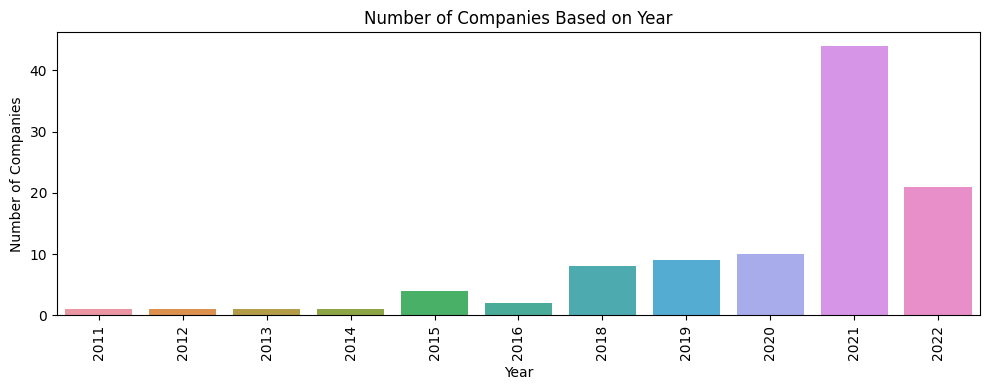

In [4]:
# Count the number of companies based on the year of entry
year_counts = df['Year'].value_counts()

# Sort the years in ascending order
sorted_years = year_counts.sort_index()

# Plot the number of companies based on the year of entry using a line plot
plt.figure(figsize=(10, 4))
sns.barplot(x=sorted_years.index, y=sorted_years.values)
plt.xlabel('Year')
plt.ylabel('Number of Companies')
plt.title('Number of Companies Based on Year')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Insights:
1. The year 2021 witnessed a remarkable surge in the establishment of unicorn startups, marking it as a pinnacle year for such ventures.
2. In the subsequent year, 2022, although the number of startups remained high, it experienced a slight decrease compared to the unprecedented growth observed in 2021.
3. Prior to 2021, the years 2018, 2019, and 2020 demonstrated a reasonably healthy environment for startup activities.
4. However, preceding the aforementioned years, no notable periods were recognized as particularly prosperous for startups.

## Let's analyse the startup's which emerged in the 2021

In [5]:
df_2021=df[df['Year']==2021]

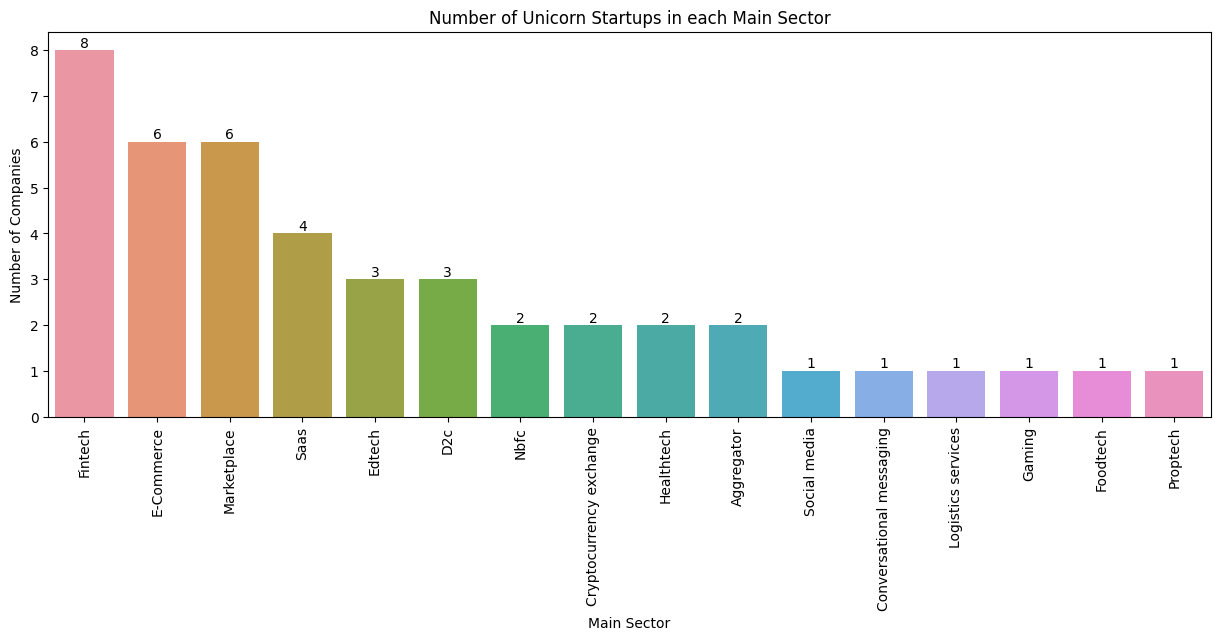

In [22]:
#Sector-Wise Analysis
# Calculate the frequency of each Main_Sector
sector_counts = df_2021['Main_Sector'].value_counts()

# Create a bar plot
plt.figure(figsize=(15, 5))
sns.barplot(x=sector_counts.index, y=sector_counts.values)
plt.xlabel('Main Sector')
plt.ylabel('Number of Companies')
plt.title('Number of Unicorn Startups in each Main Sector')
plt.xticks(rotation=90)

# Add count labels to the bars
for i, count in enumerate(sector_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

### Insights:

- Fintech and E-commerce sectors attracted the highest number of startups in 2021, indicating significant interest and investment in these industries.
- E-commerce Marketplaces exhibited impressive growth, driven by consumer convenience and increased adoption of online shopping.
- Saas, Edtech, and D2C sectors emerged as strong contenders, showcasing promising growth prospects and market competitiveness. These industries capitalized on technological advancements and changing consumer behaviors.

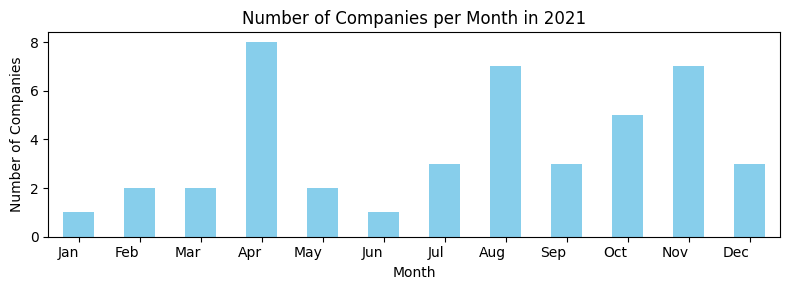

In [10]:
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Group the data by 'Month' and count the number of companies in each month, ensuring the correct order
companies_per_month = df_2021.groupby('Month', sort=False).size().reindex(month_order)

# Plot the graph
plt.figure(figsize=(8, 3))
companies_per_month.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Companies')
plt.title('Number of Companies per Month in 2021')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()


### Insights

- April and the second half of 2021, starting from July, witnessed a surge in unicorn startups.
- Startup activity was notably higher during the fourth quarter of the year.


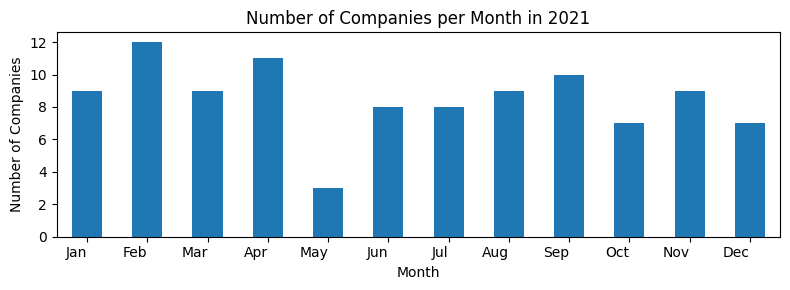

In [13]:
## Let's do the same analysis on entire dataset.
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Group the data by 'Month' and count the number of companies in each month, ensuring the correct order
companies_per_month = df.groupby('Month', sort=False).size().reindex(month_order)

# Plot the graph
plt.figure(figsize=(8, 3))
companies_per_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of Companies')
plt.title('Number of Companies per Month in 2021')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

### Insights:

- A recurring pattern is observed in the number of startups over the past few years, indicating distinct phases of startup activity.
- The starting and ending months of the year consistently exhibit a higher number of startups.
- Conversely, the middle months of the year show relatively lower startup activity.

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def sector_wise_analysis_per_month(df, year=None):
    # Create a dataframe for every month
    months = df['Month'].unique()
    # Sort the months in Jan, Feb, Mar order
    month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    months = sorted(months, key=lambda x: month_order.index(x))

    num_plots = len(months)
    cols = 2  # Number of columns in the subplot arrangement
    rows = (num_plots + 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))

    for i, month in enumerate(months):
        month_df = df[df['Month'] == month]
        sector_counts = month_df['Main_Sector'].value_counts()

        # Calculate the subplot position based on row and column
        row = i // cols
        col = i % cols

        # Create a bar plot for each month in a subplot
        sns.barplot(x=sector_counts.index, y=sector_counts.values, ax=axes[row, col])
        axes[row, col].set_xlabel('Main Sector')
        axes[row, col].set_ylabel('Number of Companies')
        if year is not None:
            axes[row, col].set_title(f'Number of Unicorn Startups in each Main Sector - {month} {year}')
        else:
            axes[row, col].set_title(f'Number of Unicorn Startups in each Main Sector - {month}')
        axes[row, col].set_xticklabels(sector_counts.index, rotation=90)

    # Adjust spacing between subplots
    plt.tight_layout()

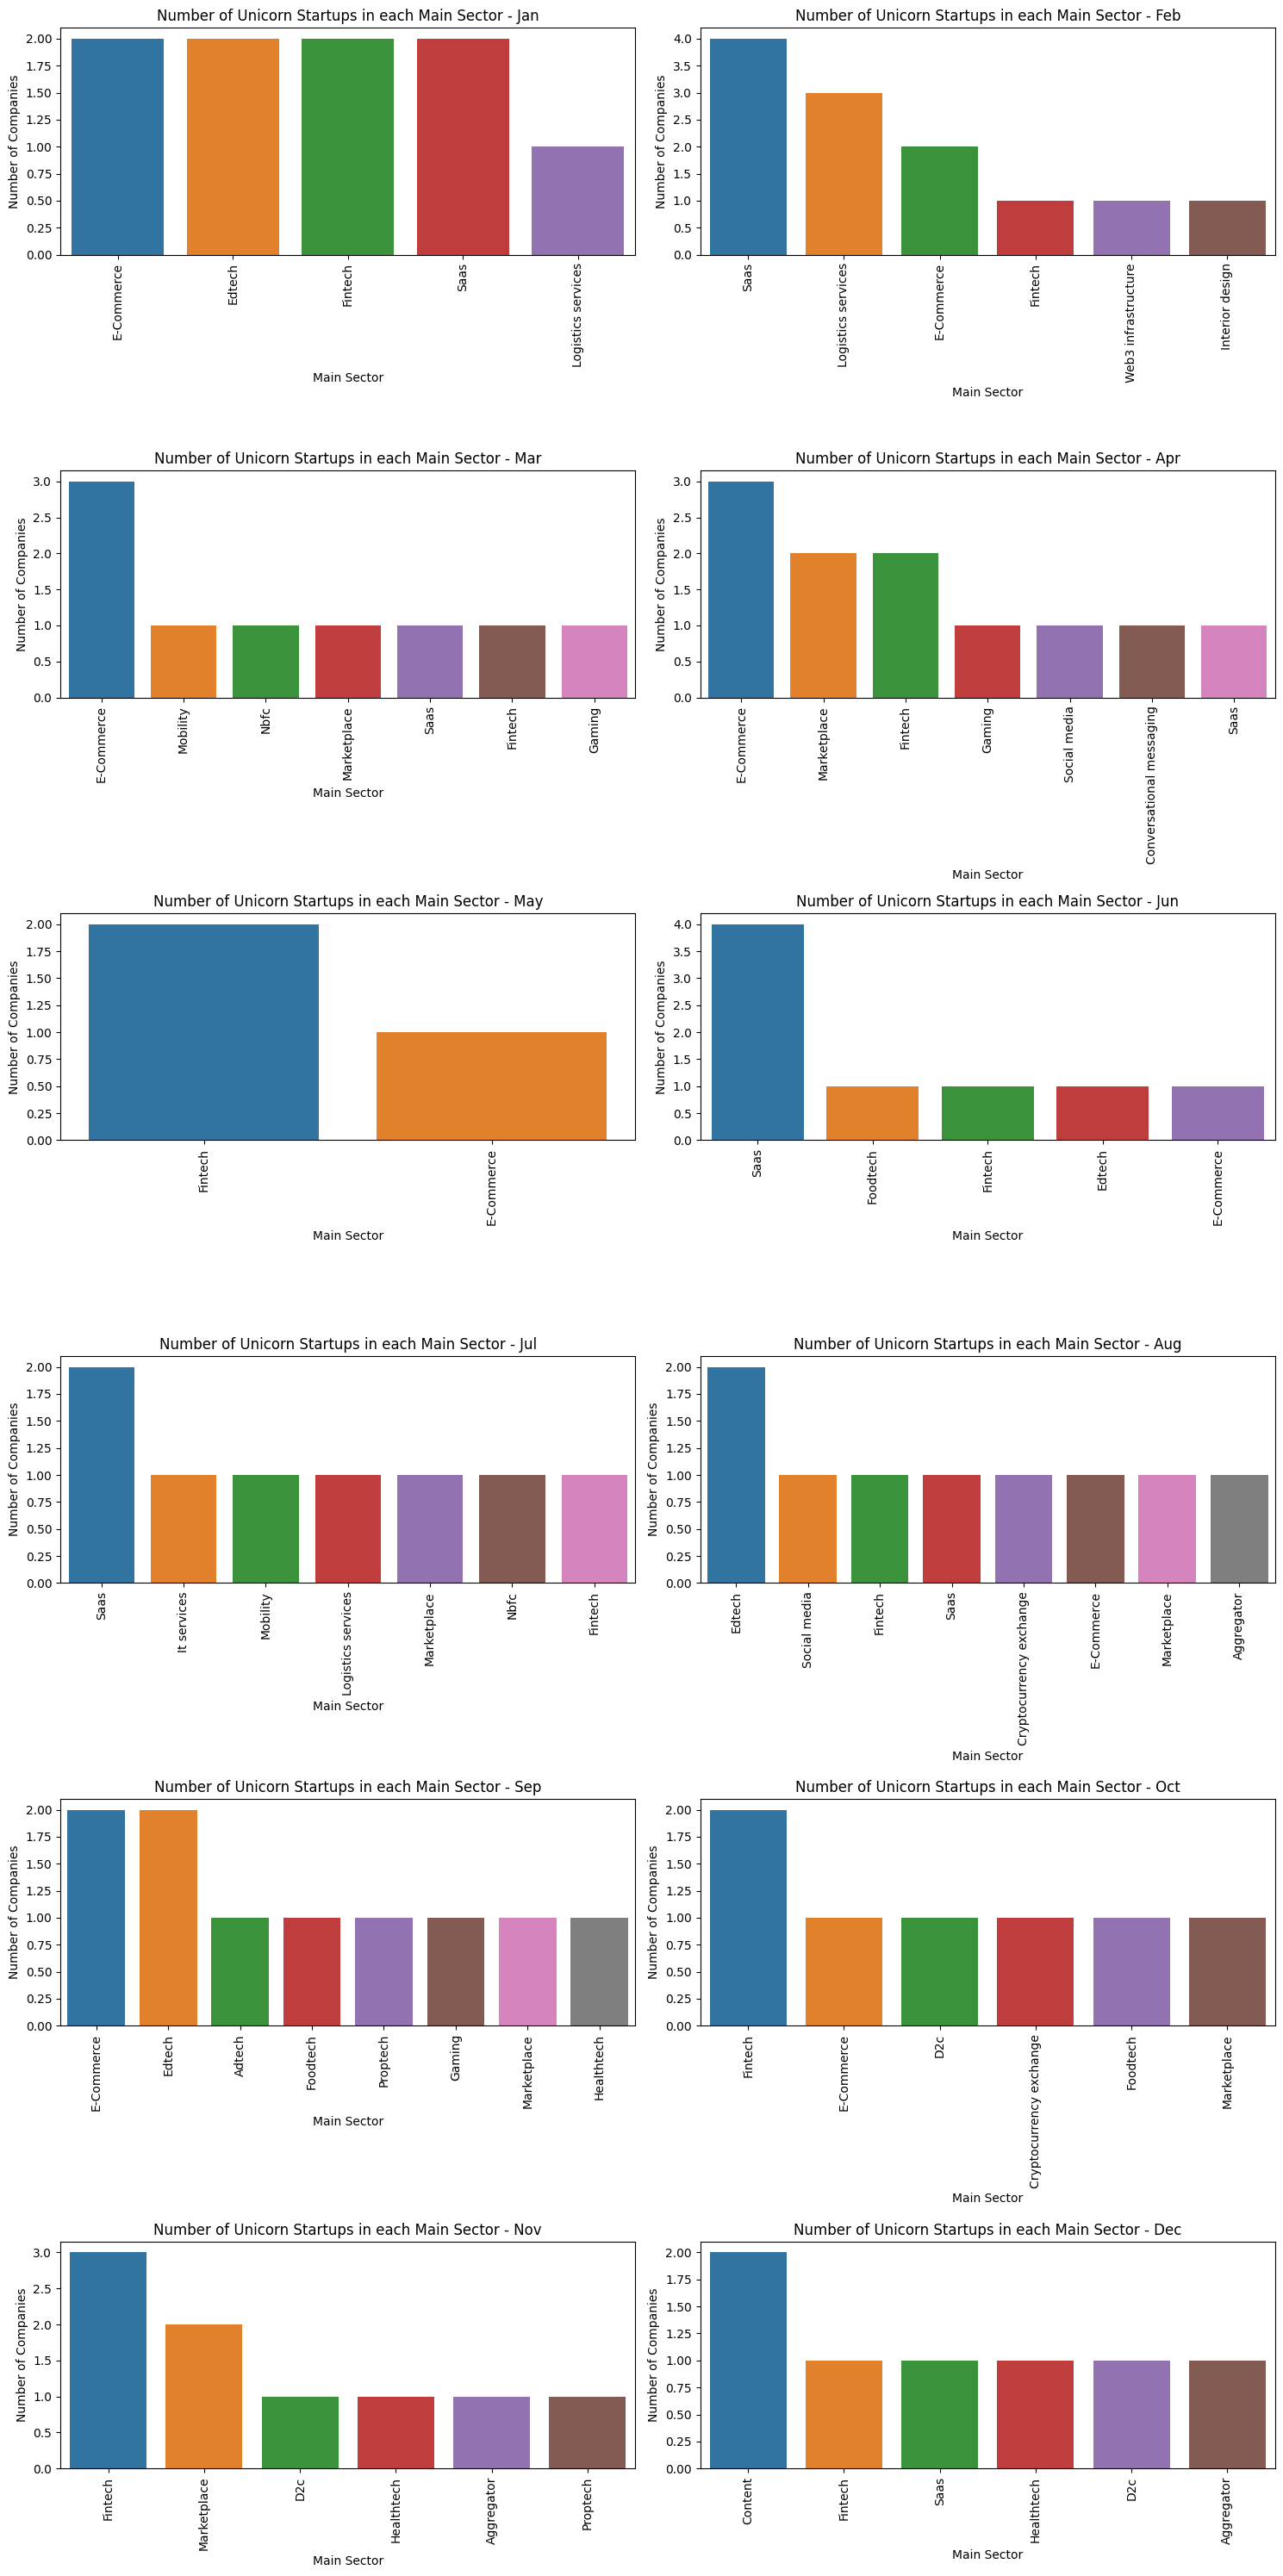

In [39]:
sector_wise_analysis_per_month(df)

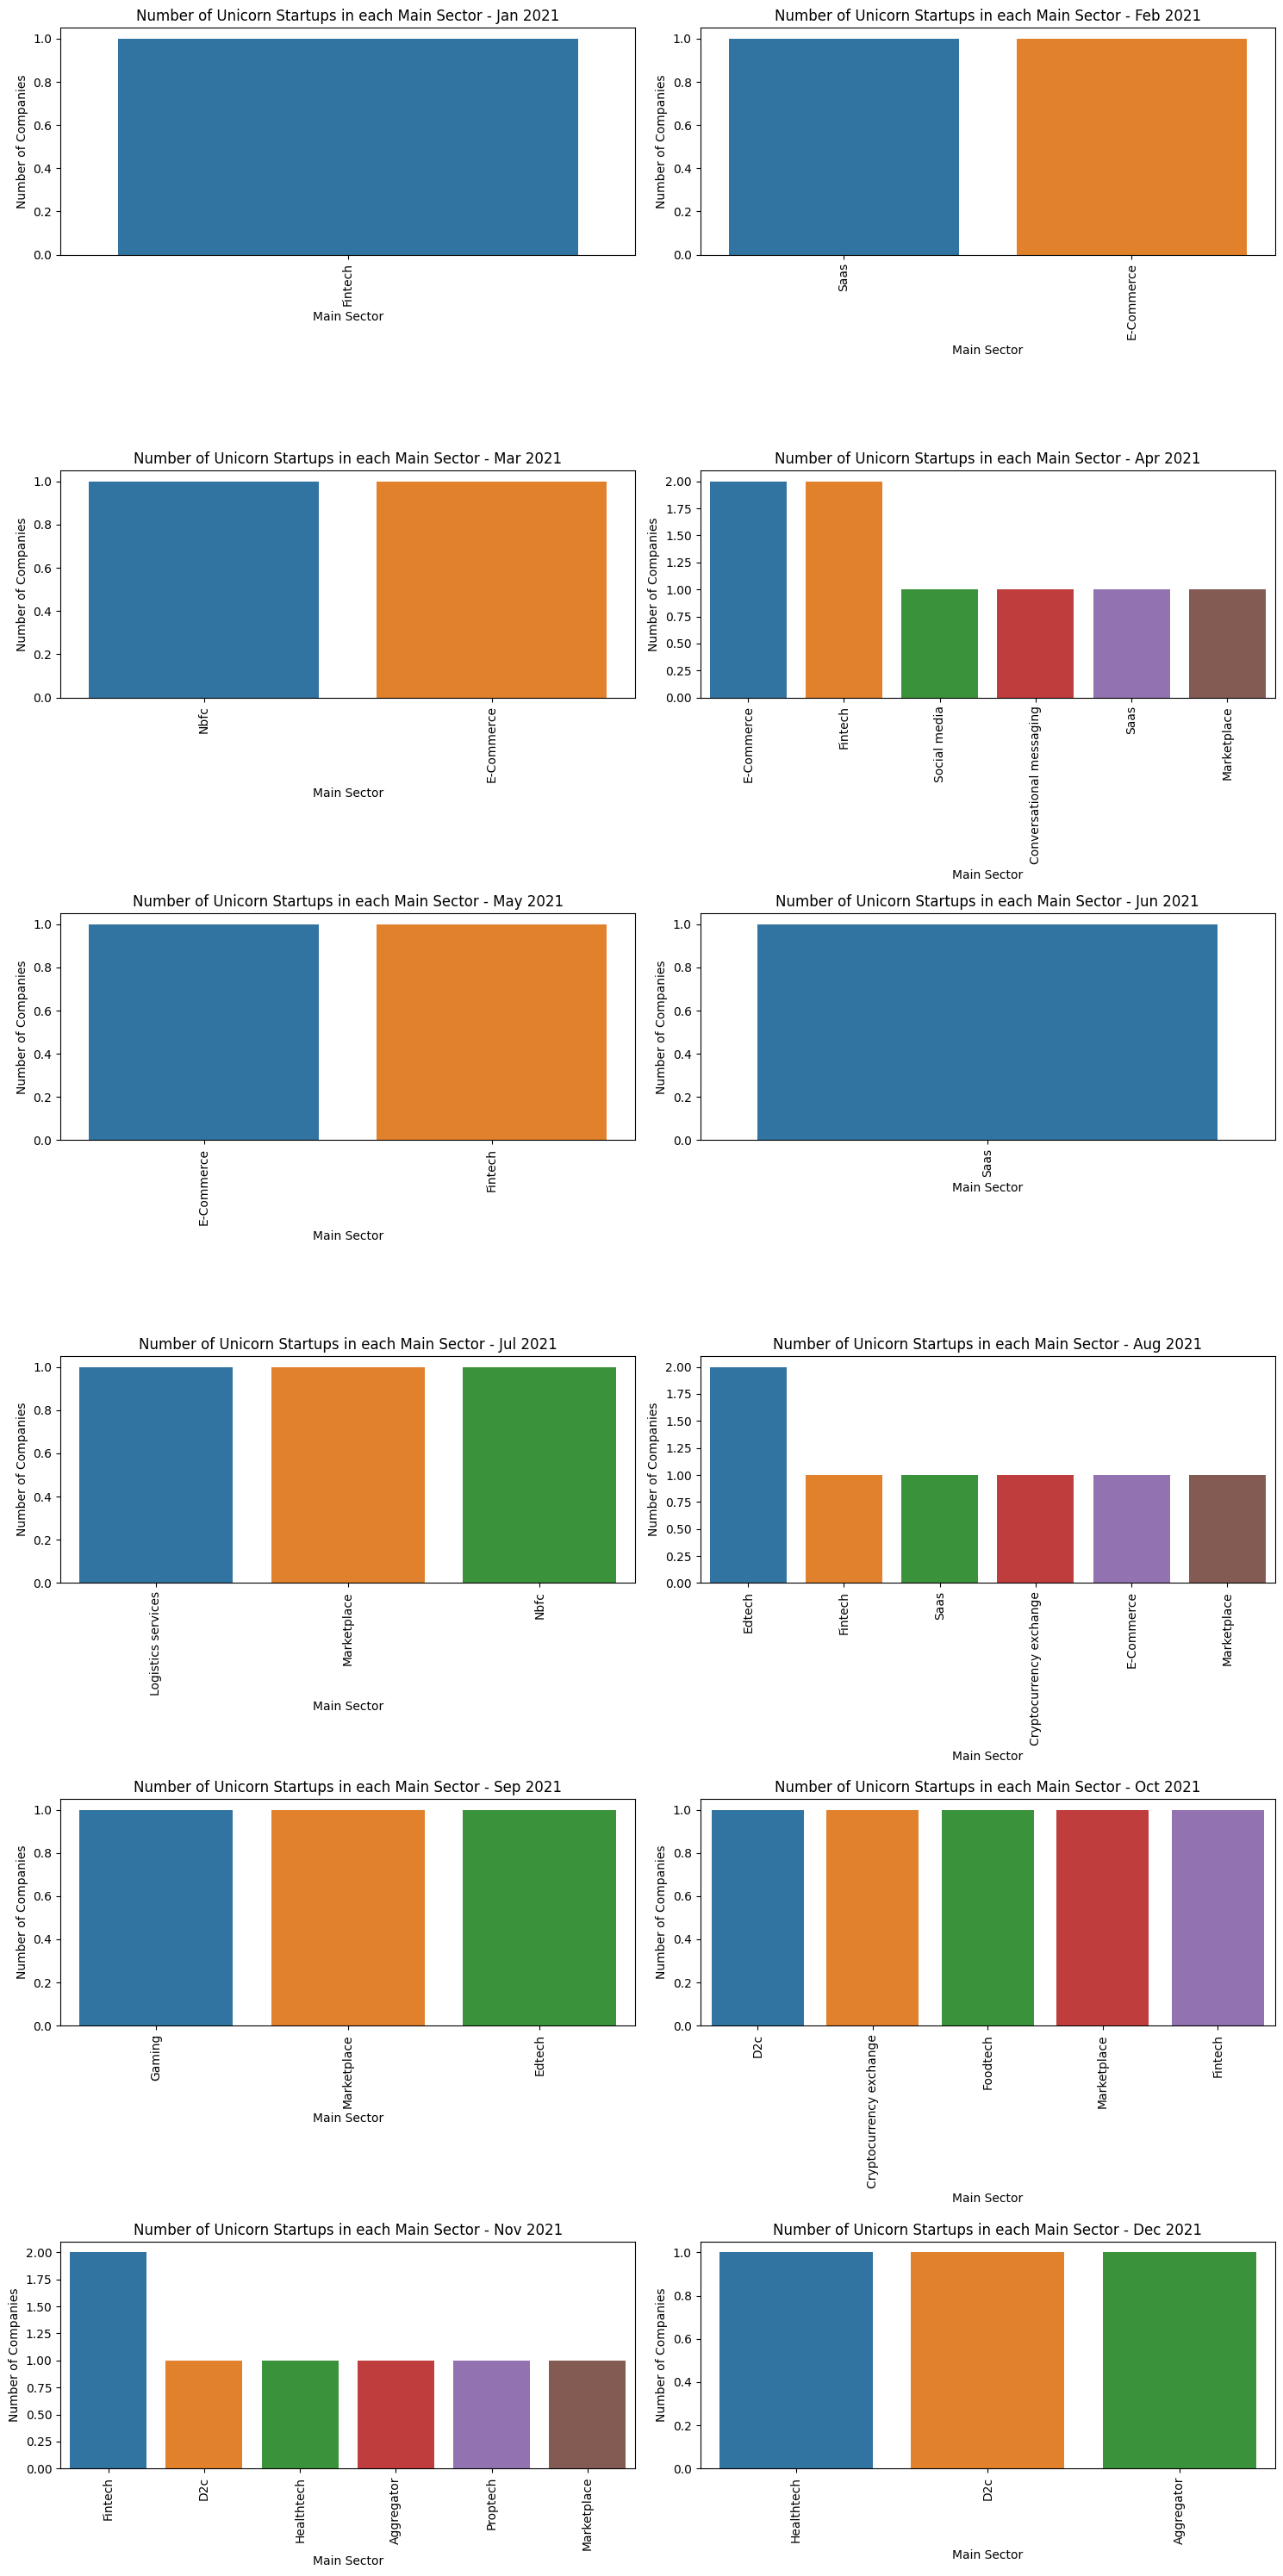

In [41]:
sector_wise_analysis_per_month(df_2021,2021)

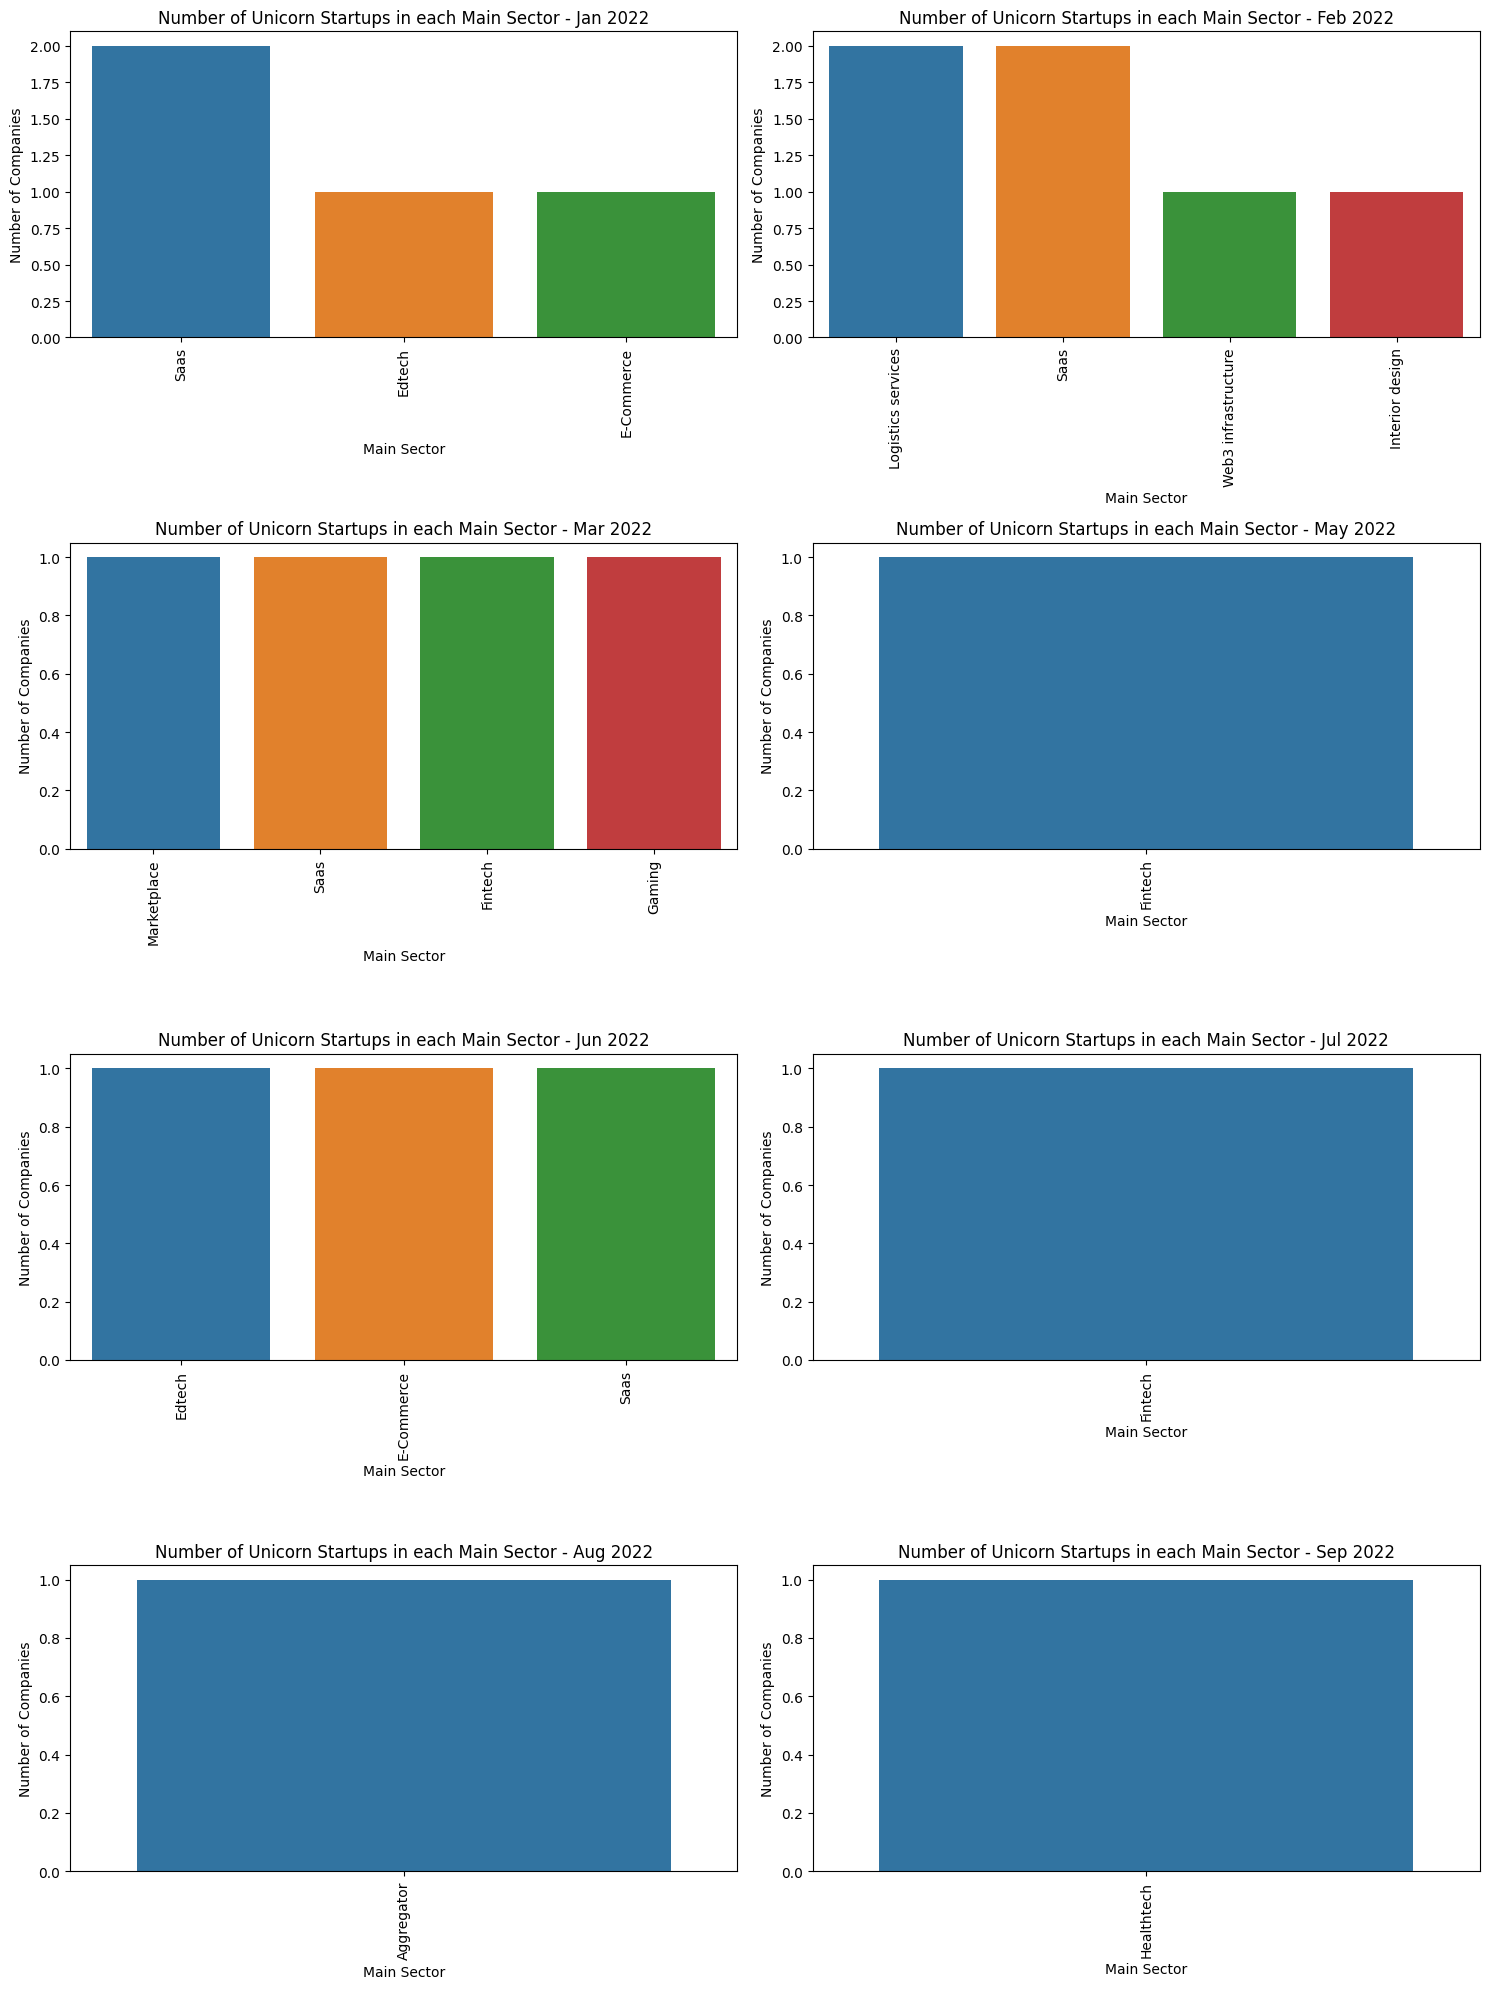

In [40]:
sector_wise_analysis_per_month(df[df['Year']==2022],2022)

## Insights:

Based on the analysis of the past few years, the trends in startups can be observed as follows:

- January: Notable presence of E-commerce, Edtech, and Fintech startups.
- February: Dominated by Saas and Logistics startups.
- March: Prominent E-commerce startups.
- April: Continued presence of E-commerce and Fintech startups.
- May: Strong presence of E-commerce and Fintech startups.
- June: Focused on Saas startups.
- July: Emphasis on Saas startups.
- August: Mainly Edtech startups.
- September: Presence of Edtech and E-commerce startups.
- October: Notable Fintech startups.
- November: Significant Fintech and Marketplace startups.
- December: Presence of Content and Fintech startups.

The trends indicate that certain sectors show consistent activity and prevalence throughout the year, while others might have periodic prominence. E-commerce, Fintech, and Edtech are observed as key players, appearing in multiple months with a substantial number of startups. Saas and Marketplace sectors also demonstrate noteworthy presence in specific months. Entrepreneurs and investors can leverage these insights to identify promising areas for investment and capitalize on prevailing opportunities in the startup landscape.